<a href="https://colab.research.google.com/github/dla9944/2023_God_damn_deeplearning/blob/master/GAN_%EC%B4%88%EA%B8%B0%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt
import random

In [90]:
def generate_real():
    real_data = torch.FloatTensor([1, 0, 1, 0])
    return real_data

In [50]:
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.0, 0.3),
         random.uniform(0.3, 2.6),
         random.uniform(3.8, 6.0),
         random.uniform(0.0, 9.5)]
    )
    return real_data

In [91]:
generate_real()

tensor([1., 0., 1., 0.])

In [92]:
class Discriminator(nn.Module):
   def __init__(self):
       super().__init__()
       self.model = nn.Sequential(
           nn.Linear(4,2),
           nn.Sigmoid(),
           nn.Linear(2,1),
           nn.Sigmoid()
       )

       self.loss_function = nn.MSELoss()
       self.optimizer = torch.optim.SGD(self.parameters(), lr = 0.01)

       self.counter = 0;
       self.progress = []

   def forward(self, inputs):
       return self.model(inputs)

   def train(self, inputs, targets):
       outputs = self.forward(inputs)
       loss = self.loss_function(outputs, targets)
       self.counter += 1;
       if (self.counter % 1 ==0):
          self.progress.append(loss.item())
          pass
       if (self.counter % 10000 == 0):
          print("counter = ", self.counter)
          pass
          self.optimizer.zero_grad()
          loss.backward()
          self.optimizer.step()

          pass

   def plot_progress(self):
       df = pd.DataFrame(self.progress, columns=['loss'])
       df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha = 0.1, marker= '.', grid = True, yticks = (0, 0.25, 0.5))
       pass

In [93]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

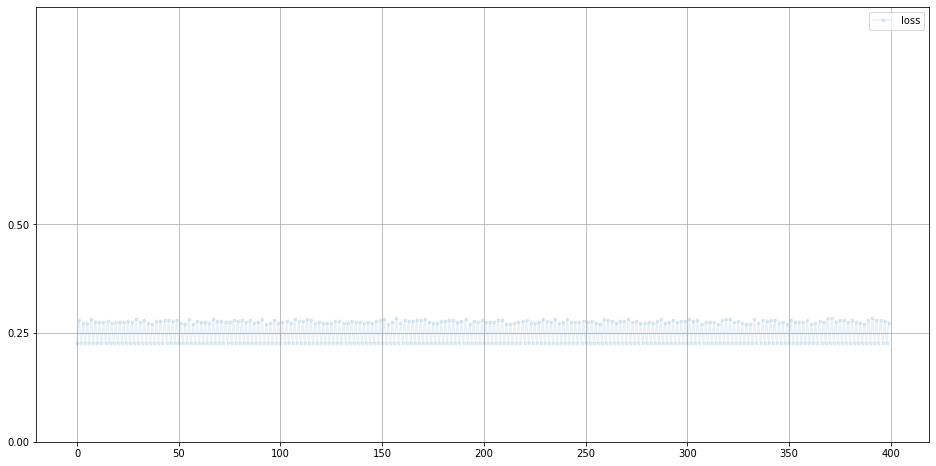

In [96]:
D = Discriminator()

for i in range(200):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))

D.plot_progress()

In [ ]:
# 10000회 진행시

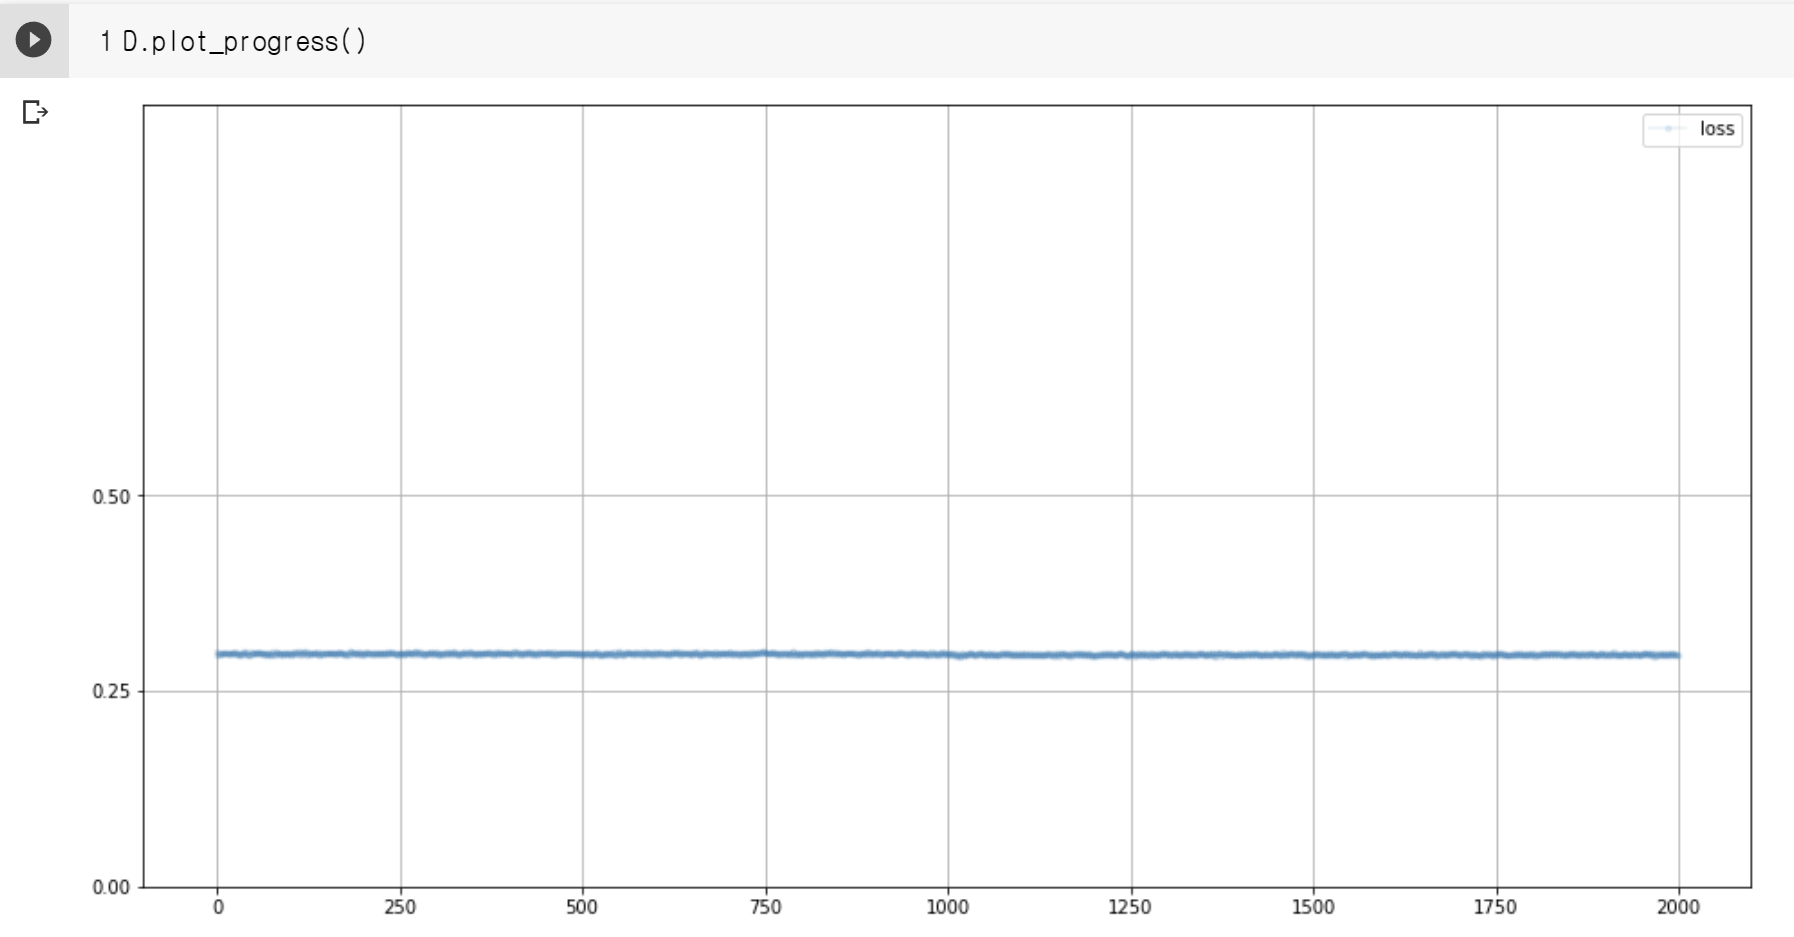

In [ ]:
# 10000회 진행시

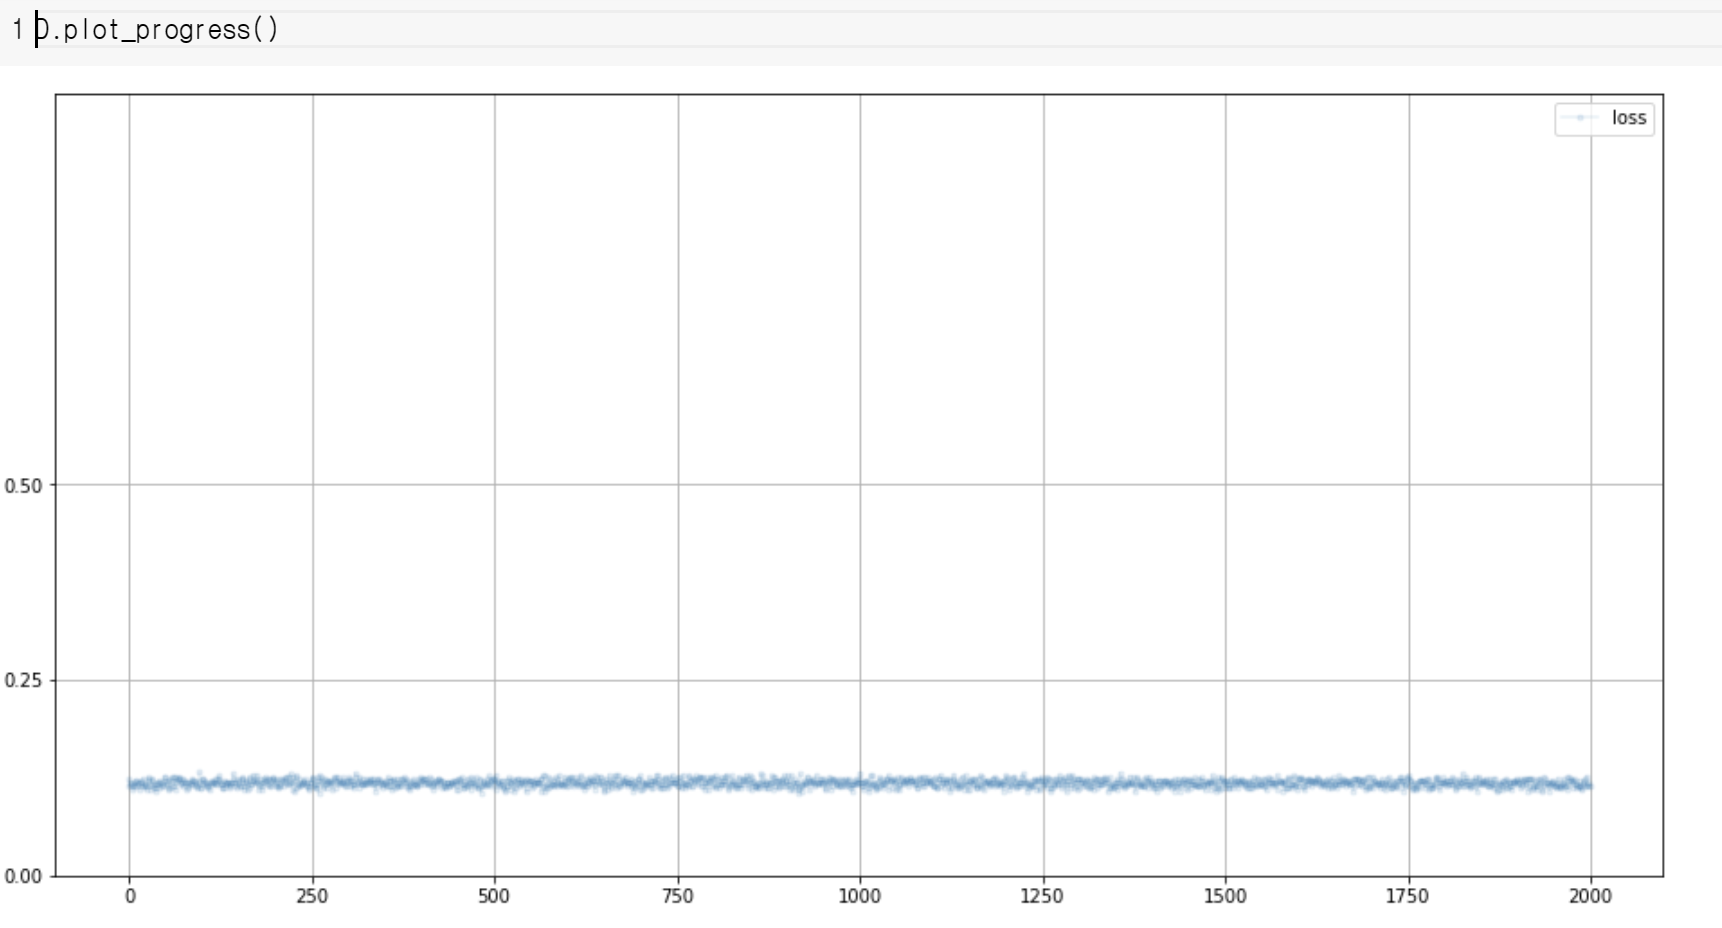